In [2]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import pylab as plt
%matplotlib inline  

/Users/Justin/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


$$ m\in{0,1,...M} $$


$$ r_1 = \frac{A K u^n}{B (1+K u^n)} $$


$$ \dot{r_2} = \frac{a_2}{1+k_1 r_{1}^n} - b r_2 $$

$$ \dot{r_3} = \frac{a_3}{1+k_2 r_{2}^n} - b r_3 $$


$$ r_0(u) \propto GFP(u) $$

In [3]:
folder = "/Volumes/3TB/CloudStorage/Dropbox/2015_Nature_biotech_paper_submission/Data/ModelingAnalysis/Analyses/CascadeModelAnalysis_15-12-10/"
alldata = pd.read_csv(os.path.join(folder, 'ExperimentalData', 'alldata.csv'))
means = pd.read_csv(os.path.join(folder, 'ExperimentalData', 'means.csv'))
std = pd.read_csv(os.path.join(folder, 'ExperimentalData', 'std.csv'))
fits = pd.read_csv(os.path.join(folder, 'Fitting', 'fit.csv'))

{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.25,
 'figure.facecolor': 'white',
 'font.family': [u'sans-serif'],
 'font.sans-serif': [u'Arial',
  u'Liberation Sans',
  u'Bitstream Vera Sans',
  u'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': u'-',
 'image.cmap': u'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': u'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': u'out',
 'xtick.major.size': 6.0,
 'xtick.minor.size': 3.0,
 'ytick.color': '.15',
 'ytick.direction': u'out',
 'ytick.major.size': 6.0,
 'ytick.minor.size': 3.0}

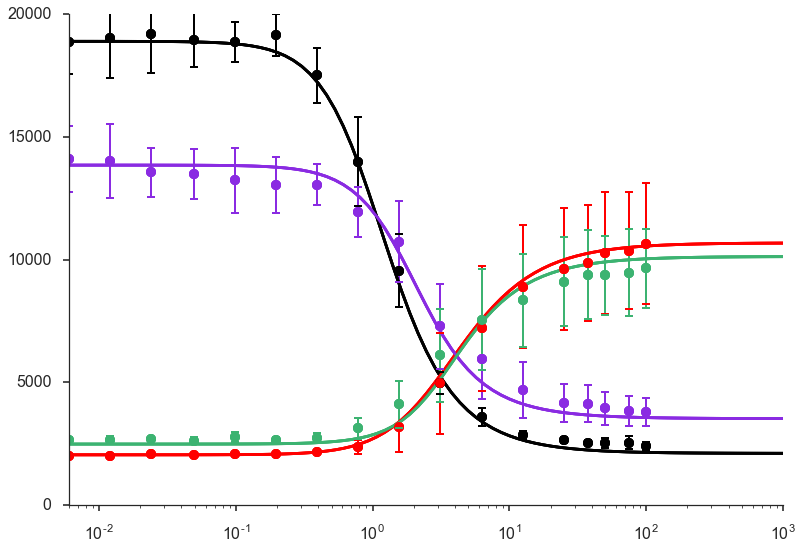

In [4]:
def plot(g, f):
    plt.xscale('log')
#     size = 30
#     g = means
#     plt.scatter(g['treatment'], g['6059'], c='black', s = size, edgecolor='none')
#     plt.scatter(g['treatment'], g['6325'], c='r', s = size, edgecolor='none')
#     plt.scatter(g['treatment'], g['6326'], c='blueviolet', s=size, edgecolor='none')
#     plt.scatter(g['treatment'], g['6327'], c='mediumseagreen', s=size, edgecolor='none')
    plt.plot(f['treatment'], f['6059'], marker=None, c='black')
    plt.plot(f['treatment'], f['6325'], marker=None, c='r')
    plt.plot(f['treatment'], f['6326'], marker=None, c='blueviolet')
    plt.plot(f['treatment'], f['6327'], marker=None, c='mediumseagreen')
    capsize = 4
    capthick = 2
    fmt = 'o'
    elinewidth=2.0
    ms = 10
    plt.errorbar(means['treatment'], means['6059'], 
                 yerr=std['6059'], 
                 fmt=fmt, c='black', capthick=capthick, 
                 capsize=capsize, elinewidth=elinewidth, 
                 ms=ms)
    plt.errorbar(means['treatment'], means['6325'], 
                 yerr=std['6325'], 
                 fmt=fmt, c='r', capthick=capthick, 
                 capsize=capsize, elinewidth=elinewidth,
                 ms=ms)
    plt.errorbar(means['treatment'], means['6326'], 
                 yerr=std['6326'], 
                 fmt=fmt, c='blueviolet', capthick=capthick, 
                 capsize=capsize, elinewidth=elinewidth,
                 ms=ms)
    plt.errorbar(means['treatment'], means['6327'], 
                 yerr=std['6327'], 
                 fmt=fmt, c='mediumseagreen', capthick=capthick, 
                 capsize=capsize, elinewidth=elinewidth,
                 ms=ms)
#     plt.errorbar(means['treatment'], means['6327'], 
#                  yerr=[std['treatment'], -std['6327']], 
#                  fmt='-', c='mediumseagreen', capthick=3, capsize=10)
#     plt.errorbar(means['treatment'], means['6326'], yerr=[std['treatment'], std['6326']], fmt=None)
#     plt.errorbar(means['treatment'], means['6325'], yerr=[std['treatment'], std['6325']], fmt=None)
#     plt.errorbar(means['treatment'], means['6059'], yerr=[std['treatment'], std['6059']], fmt=None)
    plt.xlim(0.006, 1000)
    plt.ylim(0,20000)
sns.set_palette("Reds")
sns.set_context('poster')
sns.set_style('whitegrid', {'axes.linewidth': 10.0,})
sns.set_style('ticks')
for g in alldata.groupby('exp'):
    plot(g[1], fits)
sns.despine()
plt.savefig(os.path.join(folder, 'Fitting', 'figure.pdf'), dpi=400)
sns.axes_style()